<a href="https://colab.research.google.com/github/sandalis05/PriceProphet/blob/main/Predict_Housing_Prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#reference - https://www.kaggle.com/datasets/moewie94/housepricedata
from google.colab import files
uploaded = files.upload()

Saving housepricedata.csv to housepricedata.csv


In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
import pandas as pd

df = pd.read_csv('housepricedata.csv')
df

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1
...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,6,5,953,2,1,3,7,1,460,1
1456,13175,6,6,1542,2,0,3,7,2,500,1
1457,9042,7,9,1152,2,0,4,9,2,252,1
1458,9717,5,6,1078,1,0,2,5,0,240,0


In [ ]:
dataset = df.values
dataset

array([[ 8450,     7,     5, ...,     0,   548,     1],
       [ 9600,     6,     8, ...,     1,   460,     1],
       [11250,     7,     5, ...,     1,   608,     1],
       ...,
       [ 9042,     7,     9, ...,     2,   252,     1],
       [ 9717,     5,     6, ...,     0,   240,     0],
       [ 9937,     5,     6, ...,     0,   276,     0]])

In [ ]:
X = dataset[:,0:10]
Y = dataset[:,10]

In [ ]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

X_scale

array([[0.0334198 , 0.66666667, 0.5       , ..., 0.5       , 0.        ,
        0.3864598 ],
       [0.03879502, 0.55555556, 0.875     , ..., 0.33333333, 0.33333333,
        0.32440056],
       [0.04650728, 0.66666667, 0.5       , ..., 0.33333333, 0.33333333,
        0.42877292],
       ...,
       [0.03618687, 0.66666667, 1.        , ..., 0.58333333, 0.66666667,
        0.17771509],
       [0.03934189, 0.44444444, 0.625     , ..., 0.25      , 0.        ,
        0.16925247],
       [0.04037019, 0.44444444, 0.625     , ..., 0.33333333, 0.        ,
        0.19464034]])

In [ ]:
from sklearn.model_selection import train_test_split

#train split
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)
#validation and test split
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(1022, 10) (219, 10) (219, 10) (1022,) (219,) (219,)


In [26]:
#model 1- base
from keras.models import Sequential
from keras.layers import Dense

model = Sequential([
    Dense(32, activation='relu', input_shape=(10,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid'),
])

model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

hist = model.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 1s 8ms/step - loss: 0.6915 - accuracy: 0.4834 - val_loss: 0.6847 - val_accuracy: 0.5023
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6845 - accuracy: 0.4834 - val_loss: 0.6786 - val_accuracy: 0.5068
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6783 - accuracy: 0.4834 - val_loss: 0.6734 - val_accuracy: 0.5068
Epoch 4/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6729 - accuracy: 0.4853 - val_loss: 0.6688 - val_accuracy: 0.5114
Epoch 5/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6678 - accuracy: 0.5098 - val_loss: 0.6643 - val_accuracy: 0.5297
Epoch 6/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6632 - accuracy: 0.5489 - val_loss: 0.6601 - val_accuracy: 0.6347
Epoch 7/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6586 - accuracy: 0.6771 - val_loss: 0.6558 - val_accuracy: 0.6895
Epoch 8/100
3

In [27]:
model.evaluate(X_test, Y_test)[1]

7/7 [==============================] - 0s 2ms/step - loss: 0.3363 - accuracy: 0.8813


0.8812785148620605

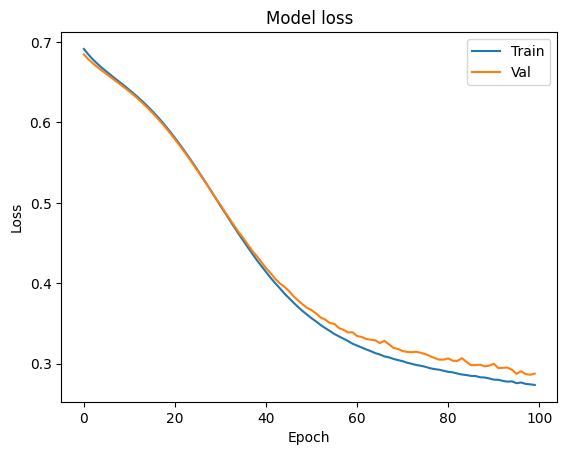

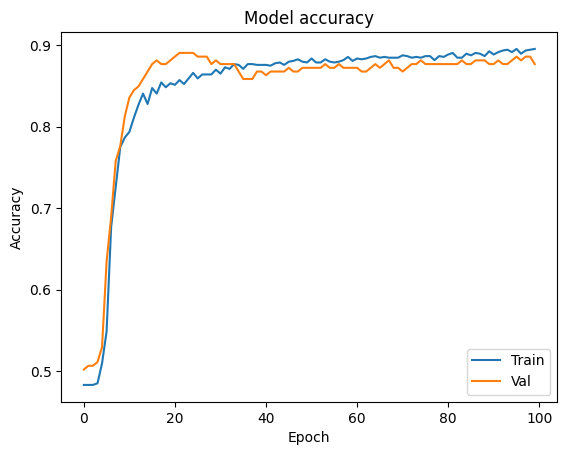

In [28]:
import matplotlib.pyplot as plt

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [29]:
#model 2 - introducing regularization

model_2 = Sequential([
    Dense(1000, activation='relu', input_shape=(10,)),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1, activation='sigmoid'),
])

model_2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

hist_2 = model_2.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 3s 48ms/step - loss: 0.4882 - accuracy: 0.7505 - val_loss: 0.4189 - val_accuracy: 0.8311
Epoch 2/100
32/32 [==============================] - 1s 42ms/step - loss: 0.3344 - accuracy: 0.8659 - val_loss: 0.3100 - val_accuracy: 0.8630
Epoch 3/100
32/32 [==============================] - 2s 63ms/step - loss: 0.3095 - accuracy: 0.8855 - val_loss: 0.3097 - val_accuracy: 0.8630
Epoch 4/100
32/32 [==============================] - 2s 54ms/step - loss: 0.2876 - accuracy: 0.8728 - val_loss: 0.2799 - val_accuracy: 0.8767
Epoch 5/100
32/32 [==============================] - 1s 42ms/step - loss: 0.2812 - accuracy: 0.8894 - val_loss: 0.2897 - val_accuracy: 0.8813
Epoch 6/100
32/32 [==============================] - 1s 42ms/step - loss: 0.2532 - accuracy: 0.9002 - val_loss: 0.2963 - val_accuracy: 0.8721
Epoch 7/100
32/32 [==============================] - 1s 42ms/step - loss: 0.2688 - accuracy: 0.8816 - val_loss: 0.2532 - val_accuracy: 0.8858
Epoch 

In [30]:
model_2.evaluate(X_test, Y_test)[1]

7/7 [==============================] - 0s 16ms/step - loss: 0.7936 - accuracy: 0.8402


0.8401826620101929

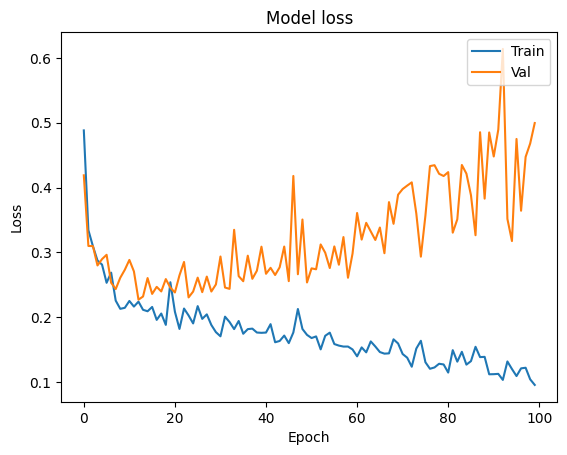

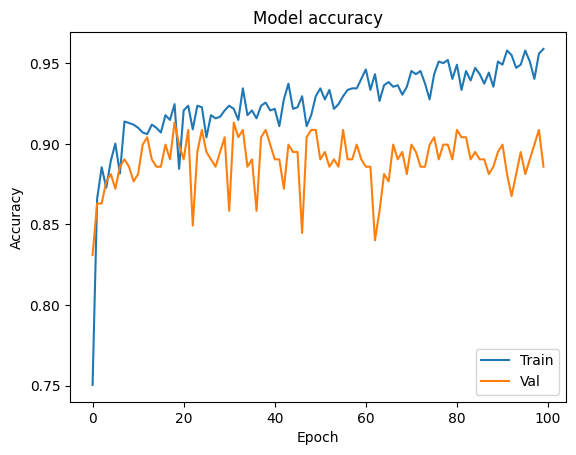

In [31]:
plt.plot(hist_2.history['loss'])
plt.plot(hist_2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

plt.plot(hist_2.history['accuracy'])
plt.plot(hist_2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [32]:
#model 3 - has the model 2 regularization but reduces overfitting - introducing dropout and regularizers

from keras.layers import Dropout
from keras import regularizers

model_3 = Sequential([
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(10,)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)),
])

model_3.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

hist_3 = model_3.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 3s 56ms/step - loss: 14.2472 - accuracy: 0.6918 - val_loss: 3.8807 - val_accuracy: 0.7808
Epoch 2/100
32/32 [==============================] - 2s 51ms/step - loss: 1.6575 - accuracy: 0.8405 - val_loss: 0.6968 - val_accuracy: 0.8082
Epoch 3/100
32/32 [==============================] - 2s 49ms/step - loss: 0.5478 - accuracy: 0.8601 - val_loss: 0.5001 - val_accuracy: 0.8767
Epoch 4/100
32/32 [==============================] - 2s 49ms/step - loss: 0.4932 - accuracy: 0.8748 - val_loss: 0.4888 - val_accuracy: 0.8858
Epoch 5/100
32/32 [==============================] - 2s 49ms/step - loss: 0.4763 - accuracy: 0.8767 - val_loss: 0.4695 - val_accuracy: 0.8858
Epoch 6/100
32/32 [==============================] - 2s 53ms/step - loss: 0.4965 - accuracy: 0.8679 - val_loss: 0.4723 - val_accuracy: 0.8630
Epoch 7/100
32/32 [==============================] - 2s 74ms/step - loss: 0.4634 - accuracy: 0.8816 - val_loss: 0.5574 - val_accuracy: 0.7945
Epoch

In [33]:
model_3.evaluate(X_test, Y_test)[1]

7/7 [==============================] - 0s 16ms/step - loss: 0.5102 - accuracy: 0.8767


0.8767123222351074

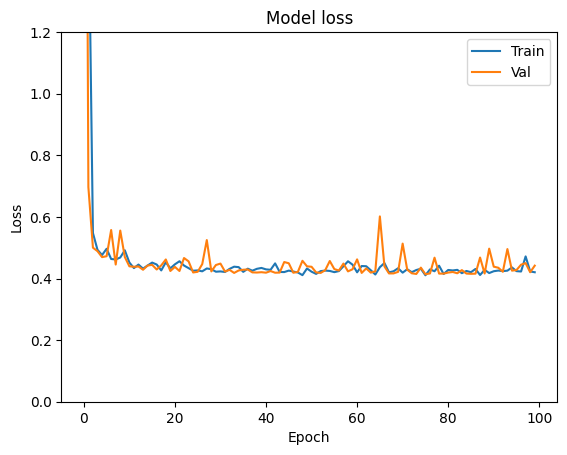

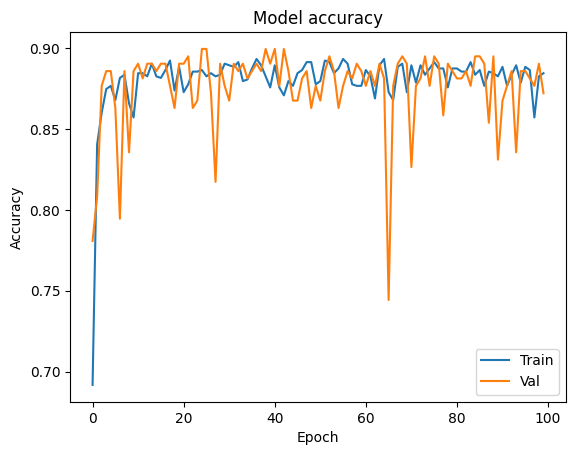

In [34]:
plt.plot(hist_3.history['loss'])
plt.plot(hist_3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.ylim(top=1.2, bottom=0)
plt.show()

plt.plot(hist_3.history['accuracy'])
plt.plot(hist_3.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [ ]:
yhat = model.predict(X_test)
yhat = yhat.round()

from sklearn.metrics import confusion_matrix
confusion_matrix(yhat, Y_test)

7/7 [==============================] - 0s 2ms/step


array([[ 83,  17],
       [ 12, 107]])

In [ ]:
#Finding precision and recall
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score
print("Precision",precision_score(yhat, Y_test))
print("Recall",recall_score(yhat, Y_test))
print("F1 score",f1_score(yhat, Y_test))

Precision 0.8629032258064516
Recall 0.8991596638655462
F1 score 0.8806584362139918


In [ ]:
from getpass import getpass
uplink_key = getpass('Enter your Uplink key: ')

Enter your Uplink key: ··········


In [ ]:
import anvil.server
anvil.server.connect(uplink_key)

In [ ]:
# #install uplink library
# !pip install anvil-uplink

In [ ]:
# example of making a single class prediction
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_blobs
import random

@anvil.server.callable
def predict_housing(lotArea,	overallQual,	overallCond,	totalBsmtSF,	fullBath,	halfBath,	bedroomAbvGr,	totRmsAbvGrd,	fireplaces,	garageArea,	aboveMedianPrice=random.randint(0, 1)):
  # generate 2d classification dataset
  X, y = make_blobs(n_samples=100, centers=2, n_features=11, random_state=1)
  # fit final model
  model = LogisticRegression()
  model.fit(X, y)
  # define one new instance
  Xnew = [[lotArea,	overallQual,	overallCond,	totalBsmtSF,	fullBath,	halfBath,	bedroomAbvGr,	totRmsAbvGrd,	fireplaces,	garageArea,	aboveMedianPrice]]
  ynew = model.predict(Xnew)

  return int(ynew)

In [ ]:
anvil.server.wait_forever()